# Notebook E-tivity 3 CE4021 Task 1

Student name: Collin Czernel

Student ID: 

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

<hr style=\"border:2px solid gray\"> </hr>

Task #1: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

If we are looking to find the probability that a dice roll will be less than 3 and greater than 10 for two, six sided
dice, this boils down to only a few "results" of each roll. Less than 3 gives only 2 as a result, and greater than
10 only gives 11, 12 as a result. e.g. sum < 3 (so 2 is the only option) and sum > 10 (so 11, 12 are the only options)

Looking at 2, the only possible option is (1, 1). 
Looking at 11, the only possible options are (5, 6) and (6, 5).
Looking at 12, the only possible option is (6, 6). 

So, there are 4 possible outcomes for which we are considering "success" cases. There are 36 total possible outcomes 
when rolling two six sided dice, so our probability is  4/36 = 1/9 that the sum of the two dice is less than 3 or 
greater than 10. This is 11.111111...%. This is the value for which we are looking to experimentally verify by running a simulator and 
tracking the results.

To simulate this, we will just create a program to run a dice roll simulator X times and store the results. Then, we can
plot this using a histogram to visualise the probabilities. From there we can simply calculate the expected number vs 
the experimentally obtained number (e.g. for 10,000 dice rolls, we expect ~1,111 "success" cases).

The standard deviation of this can be calculated with the formula $\sigma = ({\sum \left( (x_i - \mu)^2 \times P(x_i) \right)})^{1/2}$, (this is weird but I cannot get the square root to appear correctly in GitLab :/) where $x_{i}$ is each possible outcome of the sum of two dice, $\mu$ is the mean of the expected value, and $P(x_{i})$ is the probability of each of the outcomes. The mean of two dice is 7. Using our formula we can calculate the variance $\sigma^{2}$ with the formula $\sigma^{2} = \sum \left( (x_i - \mu)^2 \times P(x_i) \right)$, which is found to be $5.833$. We then take the square root to find the standard deviation, which gives us $\sigma \approx 2.415$. 

We will use our code below to experimentally try and verify this number by looking at the standard deviation of the results of our dice roll simulator.

In [3]:
trial = 1000000 # How many times are we rolling the dice?
results = np.empty(trial, dtype=int) # Creating an empty array to store this info

def roll_dice(trial): # Function to do random.randint from 1, 6 (e.g. sides of the dice), sum the two dice, and save into the results array
    for i in range(0, trial):
        results[i] = random.randint(1, 6) + random.randint(1, 6)
    return results

In [5]:
def plot_distribution(results): # plotting a histogram of results. code largely taken from stackoverflow.
    plt.figure(figsize=(8, 5))
    plt.hist(results, bins=range(2, 14), edgecolor='black', alpha=0.75, align='left') # Bins simply arranged as the number of outputs from 2-12
    plt.title('Sum of two six sided die distribution')
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Frequency')
    plt.xticks(range(2, 13))
    plt.grid(True)
    plt.show()

In [7]:
def count_success(results, trial): # Create a function to count the number of "success" cases for future use
    successes = np.array([2, 11, 12]) # Our 3 success cases, e.g. less than 3 and greater than 10 
    total_success_count = sum(np.sum(results == number) for number in successes)
    approx = (total_success_count / trial) * 100
    print("The % of 'success' cases in " + str(trial) + " trials is: " +str(approx) +"%.")
    print("e.g. the percentage of rolls less than 3 and greater than 10")
    print("For this test, there were " + str(total_success_count) + " successful rolls out of " + str(trial) + " overall rolls")
    # Did not add a return here as the calcs here aren't being used for anything else. 

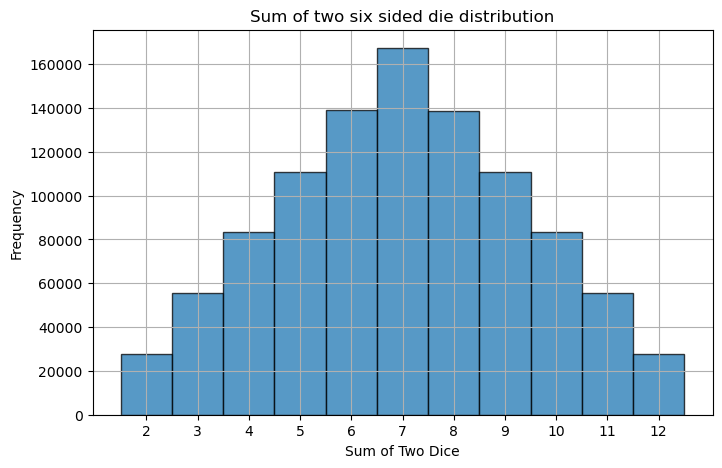

The % of 'success' cases in 1000000 trials is: 11.0907%.
e.g. the percentage of rolls less than 3 and greater than 10
For this test, there were 110907 successful rolls out of 1000000 overall rolls
The mean of the results is: 6.998204
The standard deviation of the results is: 2.4144528933868226


In [9]:
roll_dice(trial)
plot_distribution(results)
count_success(results, trial)
print("The mean of the results is: " + str(np.mean(results)))
print("The standard deviation of the results is: " + str(np.std(results)))

<hr style=\"border:2px solid gray\"> </hr>

The variable that is the sum of six sided die is a discrete random variable, e.g. it is a countable number of random, distinct values (e.g. 2-12).
I used a histogram to portray the distribution as I believe for this example it is the best way to show the probability distribution for the possible
results over a large sample. 

Dice rolling probability distribution is a triangular distribution with the peak at the sum of two die equalling 7, as shown by the output histogram. 
This can be easily explained given the number of possible rolls equalling the number of sums. For example, for a dice roll of 2, there are only 2
possible rolls that can achieve this: (1, 1). For a sum of 7, there are many, e.g. (2, 5), (3, 4), (6, 1), etc. So, for random rolling across a large 
sample it is clear that you would expect a triangular distribution (this can also be seen in the board game Settlers of Catan, of which I am a fan, 
and shows why 6/8/9 are the best tiles to settle on, and why 7 is rolled so often for the robber).

As per our previous calculations, we expect the "success" cases to be 1/9 or ~11%. That is, rolling a 2, 11, or 12, which is verified by the above results (e.g. the average value taken for several tests of 10,000 rolls is ~11%, and with larger sample rolls it will trend towards 11%). 

The standard deivation of relates to the average deviation from the mean. From our calculations, we expected the standard deviation to be $\sigma = 2.415$. Experimentally, we can get a similar result which trends closer to the calculated theoretical value for a larger sample size. 

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Write you reflection in below cell.